In [54]:
import os
import errno
import pickle
import xmltodict, json
import datetime
from time import time, strftime, localtime
from datetime import timedelta

import pandas as pd

In [55]:
# %load executionTimeCheck.py
from time import time, strftime, localtime
from datetime import timedelta


class checkExecution:
    def __init__(self):
        self.startTime = ''

    def secondsToStr(self, elapsed=None):
        if elapsed is None:
            return strftime("%Y-%m-%d %H:%M:%S", localtime())
        else:
            return str(timedelta(seconds=elapsed))

    def log(self, s, elapsed=None):
        line = "=" * 40
        print()
        print(line)
        print(self.secondsToStr(), '-', s)
        if elapsed:
            print("Elapsed time:", elapsed)
        print(line)
        print()

    def startLog(self):
        self.startTime = time()
        self.log("Start Program")

    def endLog(self):
        end = time()
        elapsed = end - self.startTime
        self.log("End Program", self.secondsToStr(elapsed))

In [56]:
e = checkExecution()

In [57]:
curr_path = os.getcwd()
sub_path = curr_path +"/Dataset/Information"

In [23]:
with open("/Users/tax_k/Projects/AI-DL/KB/Dataset/Information/2/7/드림스빌.txt", 'rb') as f:
    data = pickle.load(f)
print(data)

{'apt_name': '드림스빌', 'apt_jibun': '서울특별시 강동구 성내동 508-2', 'apt_area': ['76.08Am²', '78.33Bm²', '86.87m²', '89.41m²', '107.66m²'], 'subway_list': ['수도권\n5서울-5호선 강동역 601m', '수도권\n5서울-5호선 둔촌동역 916m', '수도권\n5서울-5호선 천호역 968m'], 'conv_lists': ['홈플러스익스프레스 성내점'], 'road_lists': ['-'], 'edu_lists': ['송원유치원', ' 준현유치원', ' 서울성일초등학교', ' 성내중학교'], 'medi_lists': ['병원 (2개)', ' 보건소 (1개)'], 'park_lists': ['성내근린공원'], 'etc_lists': ['강동구립성내도서관', ' 성내2동주민센터', ' 강동구청 제2청사'], 'apt_internal_info': {'총 세대수': '12세대', '총 동수': '1동', '최고층': '7층', '최저층': '7층', '총 주차대수': '12대', '세대당 주차대수': '1대', '준공년월': '2003.07', '건설사명': '대월종합건설', '난방방식(연료)': '개별(도시가스)'}}


In [58]:
e.startLog()
whole_data = []
for name in sorted(os.listdir(sub_path)):
    path = os.path.join(sub_path, name)
    if os.path.isdir(path):
        for fname in sorted(os.listdir(path)):
            fpath = os.path.join(path, fname)
            if os.path.isdir(fpath):
                for aptname in (os.listdir(fpath)):
                    only_apt_name = aptname[:-4]
                    if not aptname.startswith('.') and os.path.isfile(os.path.join(fpath, aptname)):
                        apt_name_path = os.path.join(fpath, aptname)

                        with open(apt_name_path, 'rb') as f:
                            data = pickle.load(f)
                            
                            data["gu"] = name
                            data["dong"] = fname
                            data["name"] = only_apt_name
                            if data is None:
                                print('hack')
                            else:
                                whole_data.append(data)
e.endLog()


2018-10-29 19:13:41 - Start Program


2018-10-29 19:13:46 - End Program
Elapsed time: 0:00:05.190929



In [59]:
pds_frame = pd.DataFrame(whole_data)

In [64]:
pds_frame.head()

,apt_area,apt_internal_info,apt_jibun,apt_name,conv_lists,dong,edu_lists,etc_lists,gu,medi_lists,name,park_lists,road_lists,subway_list
0,"[174.05Cm², 174.42Dm², 177.96Em², 178.91Fm², 1...","{'총 세대수': '14세대', '총 동수': '1동', '최고층': '7층', '...",서울특별시 강남구 개포동 1165,현대빌라트,[-],1,"[초원유치원, 서울포이초등학교, 국립국악고등학교]",[M극장],1,[-],현대빌라트,[달터근린공원],[-],"[수도권\n분당분당선 구룡역 75m, 수도권\n분당분당선 개포동역 398m]"
1,"[31.61m², 44.5m², 55.76Bm², 56.2m², 63.05m²]","{'총 세대수': '1,970세대', '총 동수': '30동', '최고층': '5층...",서울특별시 강남구 개포동 656,개포시영,[홈플러스익스프레스 개포2점],1,"[서울개원초등학교병설유치원, 서울구룡초등학교, 서울포이초등학교, 국립국악고등학교]","[개포1동주민센터, 개포4동주민센터]",1,[-],개포시영,[달터근린공원],"[경부고속도로 양재ic 5분, 양재대로 5분, 강남대로 5분, 남부순환로 5분]",[수도권\n분당분당선 구룡역 852m]
2,"[99.17m², 158.67m², 195.04m²]","{'총 세대수': '270세대', '총 동수': '3동', '최고층': '15층',...",서울특별시 강남구 개포동 649,경남(2차),"[롯데슈퍼 프리미엄도곡점, 홈플러스익스프레스 개포2점]",1,"[서울개일초등학교, 구룡중학교, 개포고등학교]",[개포1동주민센터],1,[-],경남(2차),"[개포근린공원, 늘벗공원, 달터근린공원, 양재천]","[양재대로 5분, 남부순환로 5분]","[수도권\n분당분당선 구룡역 447m, 수도권\n3서울-3호선 도곡역 819m]"
3,"[79.61Am², 80.06Bm², 80.42Cm², 80.43Dm², 84.67...","{'총 세대수': '10세대', '총 동수': '1동', '최고층': '5층', '...",서울특별시 강남구 개포동 1164-30,뉴현대파크빌,[-],1,"[서울포이초등학교, 국립국악고등학교]",[M극장],1,[-],뉴현대파크빌,[달터근린공원],[-],"[수도권\n분당분당선 구룡역 447m, 수도권\n3서울-3호선 도곡역 819m]"
4,"[65.21Am², 67.4Bm², 113.46Am², 114.03Bm², 154....","{'총 세대수': '15세대', '총 동수': '1동', '최고층': '6층', '...",서울특별시 강남구 개포동 1260-11,우찬현대(101),[롯데마켓999 개포4동점],1,"[초원유치원, 서울구룡초등학교, 국립국악고등학교]",[개포4동주민센터],1,[-],우찬현대(101),"[달터근린공원, 양재천]",[-],"[수도권\n분당분당선 구룡역 214m, 수도권\n3서울-3호선 도곡역 666m]"


In [61]:
print(len(whole_data))

7977


In [62]:
final_data_path = sub_path+'/whole_apt_info.txt'

In [67]:
with open(final_data_path, 'wb') as f:
    pickle.dump(pds_frame, f)

### open info_data

In [68]:
with open(final_data_path, 'rb') as f:
    info_data = pickle.load(f)

In [117]:
info_data[:1000]["apt_internal_info"][0]

{'총 세대수': '14세대',
 '총 동수': '1동',
 '최고층': '7층',
 '최저층': '7층',
 '총 주차대수': '26대',
 '세대당 주차대수': '1.85대',
 '준공년월': '1997.12',
 '건설사명': '현대산업개발(주)',
 '난방방식(연료)': '개별(도시가스)'}

In [107]:
info_data.loc[:][info_data['apt_name'] == '부강']

,apt_area,apt_internal_info,apt_jibun,apt_name,conv_lists,dong,edu_lists,etc_lists,gu,medi_lists,name,park_lists,road_lists,subway_list
4384,"[75.12m², 84.18m², 91.19m², 95.37m²]","{'총 세대수': '18세대', '총 동수': '1동', '최고층': '6층', '...",서울특별시 강동구 천호동 317-31,부강,[-],9,"[구강사금강유치원, 서울신암초등학교, 천일중학교]","[해공도서관, 천호2동주민센터, 암사2동주민센터]",2,[병원 (1개)],부강,"[광나루한강공원, 천호공원]",[-],[수도권\n8서울-8호선 암사역 403m]


In [113]:
len(info_data.loc[:][info_data['apt_jibun'].str.contains("강동구 강일동")])

12

### open deal_data

In [70]:
with open('w_pandas_data_frame.txt', 'rb') as f:
    deal_data = pickle.load(f)

In [73]:
deal_data.tail()

,deal_price,build_y,deal_year,law_code,apt_name,deal_month,deal_day,area,ji_bun,loc_code,current_floor
1013445,"35,000",2006,2018,천호동,부강,10,21~31,84.99,317-31,11740,2
1013446,"67,800",2009,2018,강일동,강일리버파크10단지,10,1~10,84.83,695,11740,6
1013447,"84,800",2009,2018,강일동,강일리버파크10단지,10,1~10,114.81,695,11740,10
1013448,"72,000",2009,2018,강일동,강일리버파크10단지,10,1~10,84.53,695,11740,7
1013449,"75,000",2009,2018,강일동,강일리버파크6단지,10,11~20,84.74,684,11740,13


In [85]:
deal_data.loc[:][contains_word(, deal_data['apt_name'])]

,deal_price,build_y,deal_year,law_code,apt_name,deal_month,deal_day,area,ji_bun,loc_code,current_floor


### unique deal_apt_name

In [95]:
len(deal_data["apt_name"].unique()) # UNIQUE GET

ValueError: operands could not be broadcast together with shapes (7115,) (6270,) 

In [88]:
len(deal_data["ji_bun"].unique()) # UNIQUE GET

6270

In [98]:
deal_data.drop_duplicates(['apt_name', 'ji_bun'])

,deal_price,build_y,deal_year,law_code,apt_name,deal_month,deal_day,area,ji_bun,loc_code,current_floor
0,"29,500",1983,2006,당주동,세종,1,11~20,93.4,100,11110,6
1,"15,741",1998,2006,익선동,운현신화타워,1,1~10,57.18,30-6,11110,12
5,"21,500",1999,2006,명륜2가,아남3,1,11~20,47.43,237,11110,6
7,"16,800",1992,2006,창신동,창신쌍용1,1,11~20,54.7,702,11110,8
8,"16,500",1993,2006,창신동,창신쌍용2,1,11~20,64.66,703,11110,11
12,"10,500",1998,2006,숭인동,하림빌라트,1,1~10,47.63,473,11110,4
13,"17,500",1996,2006,평창동,일성빌라트,1,21~31,59.82,145-5,11110,1
16,"16,500",1998,2006,신영동,대아파크빌,1,11~20,59.22,254,11110,13
18,"42,500",2000,2006,무악동,현대,1,1~10,84.92,82,11110,20
24,"9,000",1968,2006,인현동2가,신성상가,1,21~31,42.31,192-30,11140,7


In [100]:
def contains_word(w, s):
    return (' ' + w + ' ') in (' ' + s + ' ')

In [102]:
contains_word('hi', 'aaaa hi')

True

In [114]:
import matplotlib.pyplot as plt

KeyError: "['2006' '2006' '2006' ... '2018' '2018' '2018'] not in index"

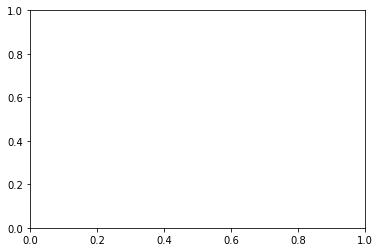

In [118]:
ax = plt.gca()

deal_data.plot(kind='line',x=deal_data["deal_year"],y=deal_data["deal_price"],ax=ax)

plt.show()